<h1>Generating Random Networks</h1>

In [13]:
library('igraph')


Attaching package: ‘igraph’

The following objects are masked from ‘package:stats’:

    decompose, spectrum

The following object is masked from ‘package:base’:

    union



<h2>1a, 1b</h2>

Mean:  2.874
Variance:  2.93906306306306
Connected:  FALSE
Diameter:  16
[1] 62
Diameter of GCC:  16


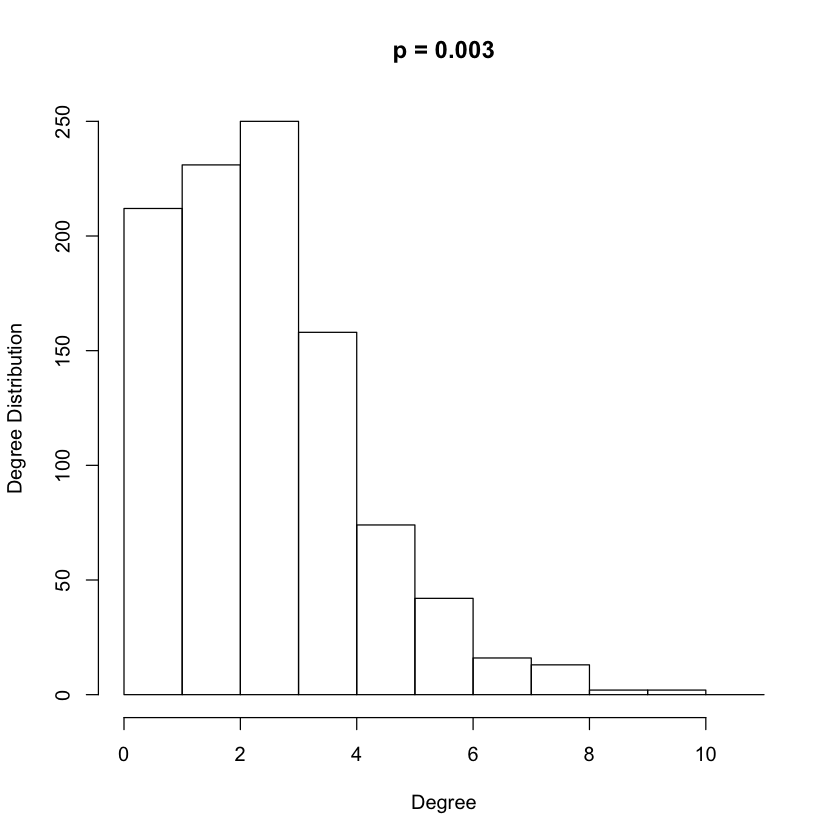

Mean:  4.04
Variance:  3.98038038038038
Connected:  FALSE
Diameter:  11
[1] 18
Diameter of GCC:  11


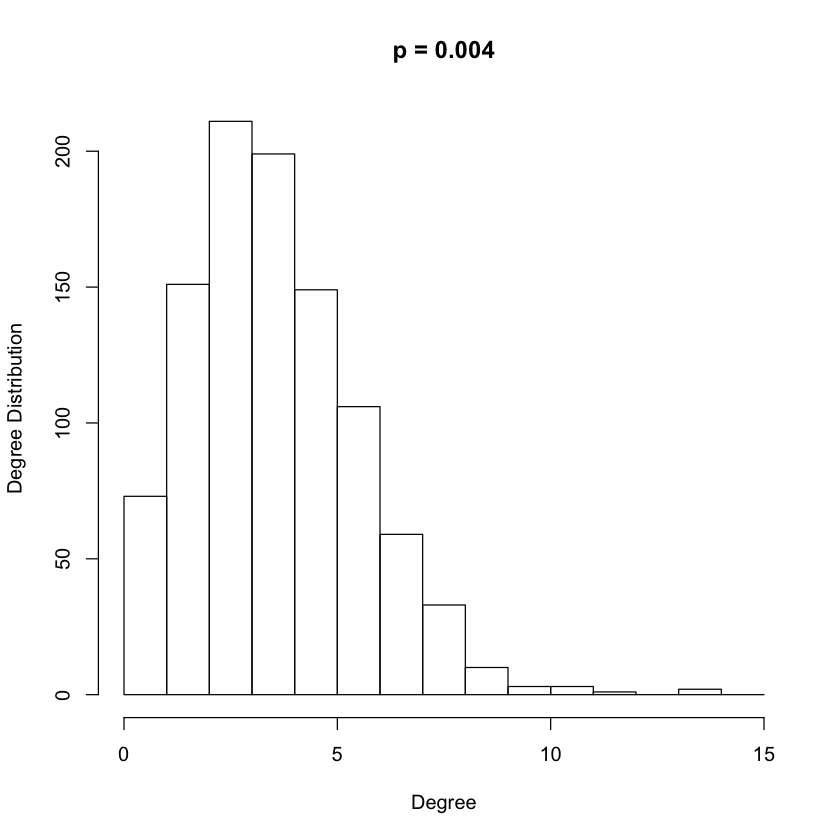

Mean:  9.998
Variance:  9.68568168168168
Connected:  TRUE
Diameter:  6


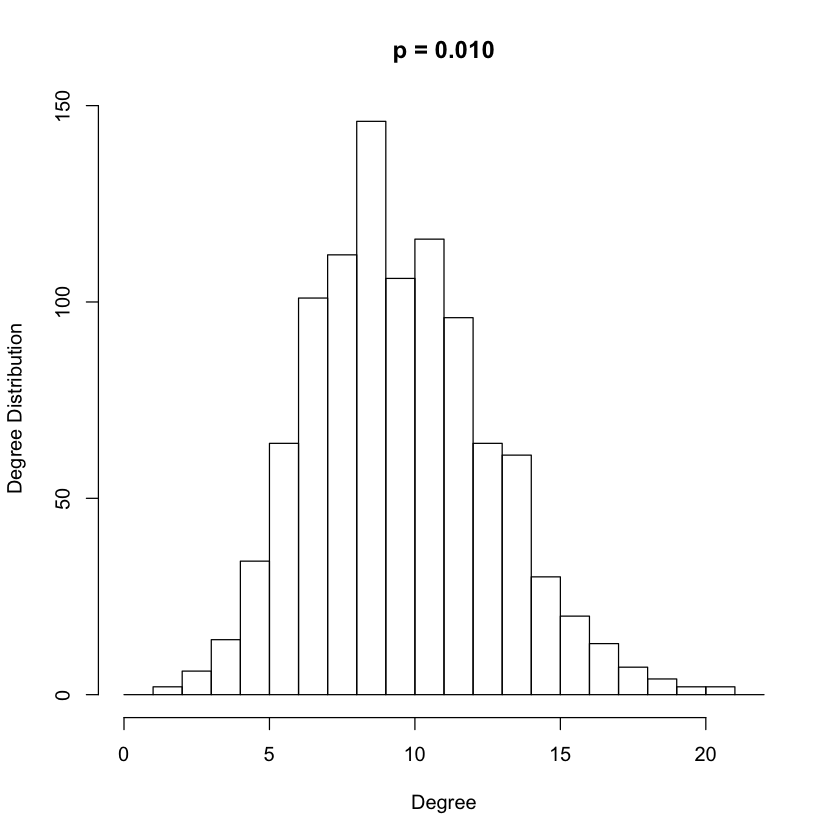

Mean:  49.942
Variance:  47.7744104104104
Connected:  TRUE
Diameter:  3


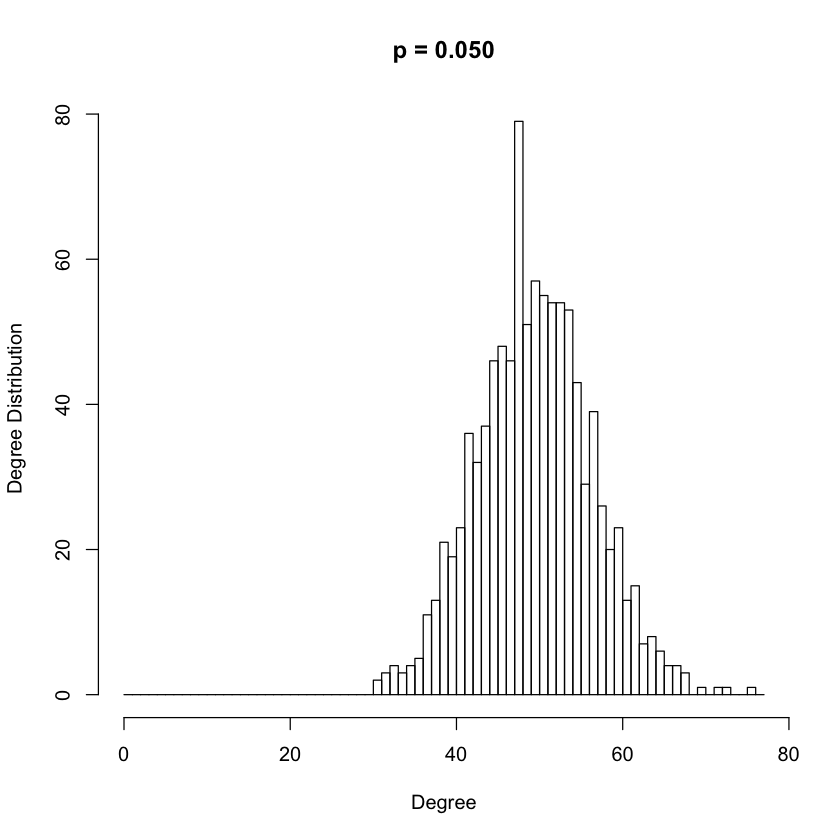

Mean:  100.144
Variance:  85.8050690690691
Connected:  TRUE
Diameter:  3


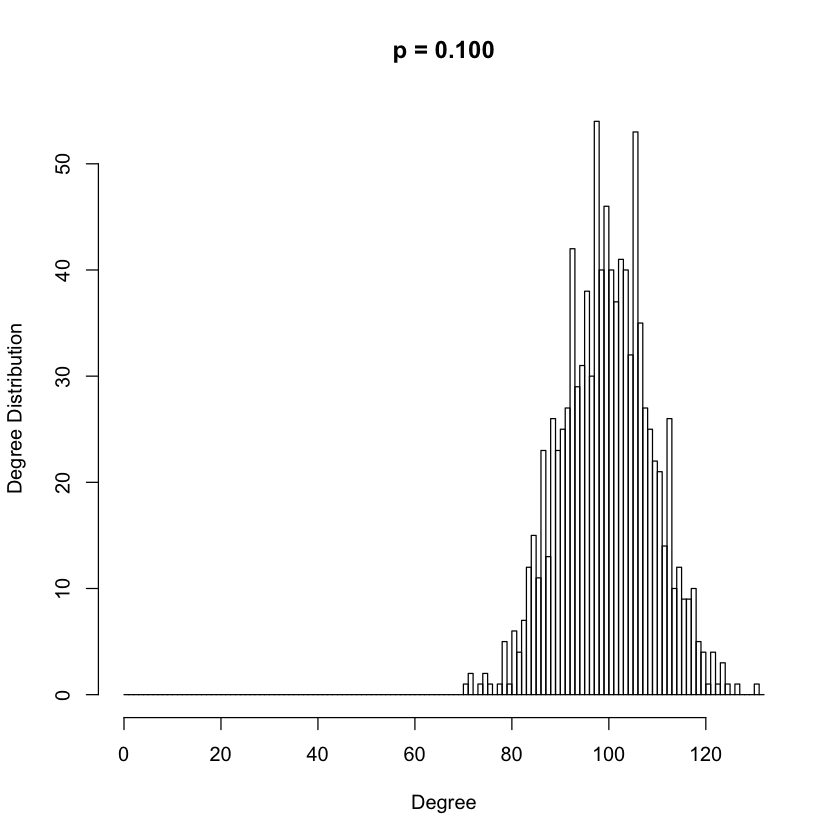

In [14]:
n = 1000
p_list = c(0.003, 0.004, 0.01, 0.05, 0.1)
for (p in p_list) {
    network <- erdos.renyi.game(n, p, type="gnp")
    deg <- degree(network)
    # *****1a*****
    hist(deg, breaks = seq(from = 0, to = max(deg) + 1, by = 1), main = sprintf("p = %.3f", p), 
          xlab = "Degree", ylab="Degree Distribution")
    
    writeLines(paste("Mean: ", mean(deg)))
    writeLines(paste("Variance: ", var(deg)))
    
    # *****1b*****
    writeLines(paste("Connected: ", is_connected(network)))
    writeLines(paste("Diameter: ", diameter(network)))
    if (!is_connected(network)) {
        dg <- decompose.graph(network) 
        #plot(dg[[1]])
        clusters <- components(network)
        print(dim(groups(clusters)))
        writeLines(paste("Diameter of GCC: ", diameter(dg[[1]])))
        #largest = network.clusters().giant()
        #print(largest)
        #giant.component.extract(network)
    }
    
}

<h2>1d</h2>

In [36]:
c_list = c(0.5, 1, 1.1, 1.2, 1.3)
colors = rainbow(length(c_list))

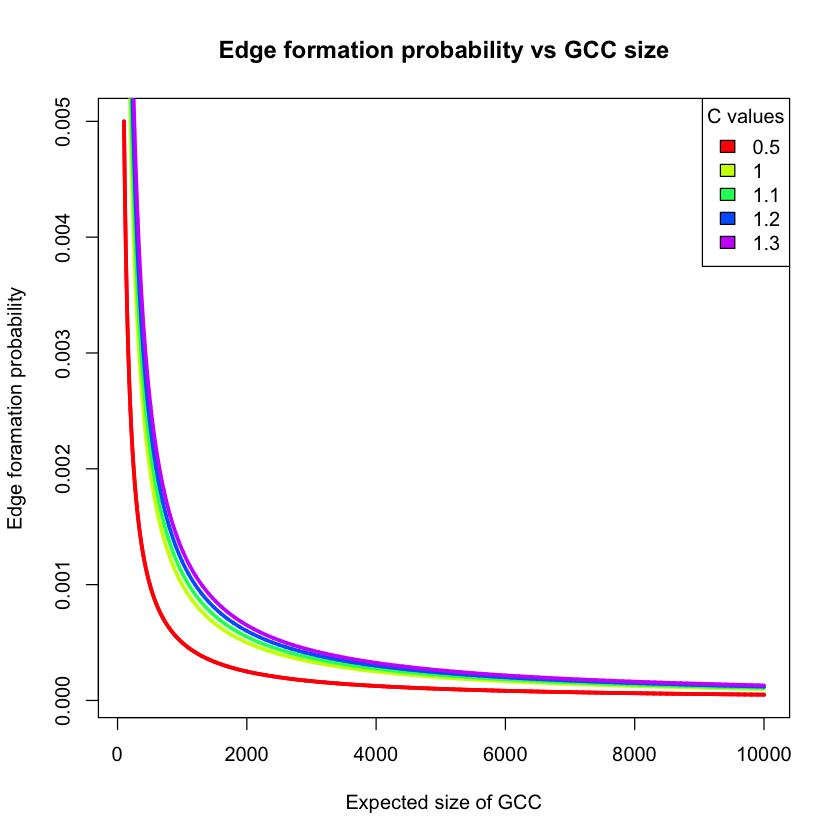

In [58]:
xrange <- seq(100, 10000, by=1)
colr = 1
counter = 1
for (c in c_list) {
    edge_form <- list()
    i = 1
    for (n in xrange) {
        if (n%%1000 == 0) {
            #print(sprintf("%d", n))
        }
        p = c/n
        edge_form[[i]] <- p
        i <- i + 1
    }
    if (counter) {
        plot(xrange, edge_form, xlab="Expected size of GCC", ylab="Edge foramation probability", col=colors[colr], type="l", lwd=3)
        counter = 0
    }
    lines(xrange, edge_form, col=colors[colr], lwd=3)
    colr <- colr + 1
}
legend("topright", legend=c_list, fill=colors, title="C values")
title("Edge formation probability vs GCC size")